In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from pylab import rcParams
from scipy import stats

from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [31]:
%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 20,10
rcParams['font.size'] = 30
sns.set()
np.random.seed(8)

In [32]:
# Selected recipes
s1 = pd.read_csv("./Pro_1/selectedrecipes.csv")
s2 = pd.read_csv("./Pro_2/selectedrecipes.csv")
s3 = pd.read_csv("./Pro_3/selectedrecipes.csv")

In [33]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo

choice_sat = ms[["choice_sat_q1","choice_sat_q2", "choice_sat_q3"]]

kmo_all,kmo_model=calculate_kmo(choice_sat)

fa = FactorAnalyzer(1)
fa.fit(choice_sat)

loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1'], index=choice_sat.columns)
print(kmo_all)
print('Factor Loadings \n%s' %loadings)


[0.50433008 0.70619774 0.50442374]
Factor Loadings 
               Factor 1
choice_sat_q1 -0.988183
choice_sat_q2  0.106579
choice_sat_q3 -0.636765


In [23]:
# Calculate mean for choice satisfaction for each participant
choice_sat = s1.loc[: , "choice_sat_q1":"choice_sat_q3"]
s1['choice_sat_mean'] = choice_sat.mean(axis=1)

choice_dif2 = s2.loc[: , "choice_sat_q1":"choice_sat_q3"] 
s2['choice_sat_mean'] = choice_dif2.mean(axis=1)

choice_dif3 = s3.loc[: , "choice_sat_q1":"choice_sat_q3"] 
s3['choice_sat_mean'] = choice_dif3.mean(axis=1)

In [5]:
# Demographic
demo1 = pd.read_csv("./Pro_1/demographics.csv")
demo2 = pd.read_csv("./Pro_2/demographics.csv")
demo3 = pd.read_csv("./Pro_3/demographics.csv")
md = pd.concat([demo1, demo2, demo3])

# Add all data to one DF
ms = pd.concat([s1, s2, s3])

In [6]:
s1_sat = s1['choice_sat_mean'].to_numpy()
s2_sat = s2['choice_sat_mean'].to_numpy()
s3_sat = s3['choice_sat_mean'].to_numpy()

In [7]:
shown1 = s1
shown2 = s2
shown3 = s3 

# Condition 1 variants
s1v1 = shown1.loc[shown1['variant'] == 1]
s1v2 = shown1.loc[shown1['variant'] == 2] 
s1v3 = shown1.loc[shown1['variant'] == 3]

# Condition 2 variants
s2v1 = shown2.loc[shown2['variant'] == 1]
s2v2 = shown2.loc[shown2['variant'] == 2]
s2v3 = shown2.loc[shown2['variant'] == 3]

# Condition 3 variants
s3v1 = shown3.loc[shown3['variant'] == 1]
s3v2 = shown3.loc[shown3['variant'] == 2]
s3v3 = shown3.loc[shown3['variant'] == 3]

In [8]:
# Take the mean of the 3 choice difficulty questions for each participant
h1 = s1v3['choice_sat_mean'].to_numpy()
h2 = s2v3['choice_sat_mean'].to_numpy()
h3 = s3v3['choice_sat_mean'].to_numpy()

r1 = s1v2['choice_sat_mean'].to_numpy()
r2 = s2v2['choice_sat_mean'].to_numpy()
r3 = s3v2['choice_sat_mean'].to_numpy()

p1 = s1v1['choice_sat_mean'].to_numpy()
p2 = s2v1['choice_sat_mean'].to_numpy()
p3 = s3v1['choice_sat_mean'].to_numpy()

In [9]:
# EXCLUDE VEGANS
no_veg_id = md['user_id'].loc[md['restrictions'] != "vegan"].values

s1_no_veg = s1[s1['user_id'].isin(no_veg_id)]
s2_no_veg = s2[s2['user_id'].isin(no_veg_id)]
s3_no_veg = s3[s3['user_id'].isin(no_veg_id)]

s1_fsa_no_veg = s1_no_veg['choice_sat_mean'].to_numpy()
s2_fsa_no_veg = s2_no_veg['choice_sat_mean'].to_numpy()
s3_fsa_no_veg = s3_no_veg['choice_sat_mean'].to_numpy()

# Condition 1 variants 
s1v1_no_veg = s1_no_veg.loc[s1_no_veg['variant'] == 1]
s1v2_no_veg = s1_no_veg.loc[s1_no_veg['variant'] == 2]
s1v3_no_veg = s1_no_veg.loc[s1_no_veg['variant'] == 3]

# Condition 2 variants
s2v1_no_veg = s2_no_veg.loc[s2_no_veg['variant'] == 1]
s2v2_no_veg = s2_no_veg.loc[s2_no_veg['variant'] == 2]
s2v3_no_veg = s2_no_veg.loc[s2_no_veg['variant'] == 3]

# Condition 3 variants
s3v1_no_veg = s3_no_veg.loc[s3_no_veg['variant'] == 1]
s3v2_no_veg = s3_no_veg.loc[s3_no_veg['variant'] == 2]
s3v3_no_veg = s3_no_veg.loc[s3_no_veg['variant'] == 3]

# Choice difficulty for each variant
s1v1_fsa_no_veg = s1v1_no_veg['choice_sat_mean'].to_numpy()
s1v2_fsa_no_veg = s1v2_no_veg['choice_sat_mean'].to_numpy()
s1v3_fsa_no_veg = s1v3_no_veg['choice_sat_mean'].to_numpy()

s2v1_fsa_no_veg = s2v1_no_veg['choice_sat_mean'].to_numpy()
s2v2_fsa_no_veg = s2v2_no_veg['choice_sat_mean'].to_numpy()
s2v3_fsa_no_veg = s2v3_no_veg['choice_sat_mean'].to_numpy()

s3v1_fsa_no_veg = s3v1_no_veg['choice_sat_mean'].to_numpy()
s3v2_fsa_no_veg = s3v2_no_veg['choice_sat_mean'].to_numpy()
s3v3_fsa_no_veg = s3v3_no_veg['choice_sat_mean'].to_numpy()

In [10]:
# EXCLUDE ALLERGIES
no_allerg_id = md['user_id'].loc[md['restrictions'] != "allergies"].values

s1_no_allerg = s1[s1['user_id'].isin(no_allerg_id)]
s2_no_allerg = s2[s2['user_id'].isin(no_allerg_id)]
s3_no_allerg = s3[s3['user_id'].isin(no_allerg_id)]

s1_fsa_no_allerg = s1_no_allerg['choice_sat_mean'].to_numpy()
s2_fsa_no_allerg = s2_no_allerg['choice_sat_mean'].to_numpy()
s3_fsa_no_allerg = s3_no_allerg['choice_sat_mean'].to_numpy()

# Condition 1 variants 
s1v1_no_allerg = s1_no_allerg.loc[s1_no_allerg['variant'] == 1]
s1v2_no_allerg = s1_no_allerg.loc[s1_no_allerg['variant'] == 2]
s1v3_no_allerg = s1_no_allerg.loc[s1_no_allerg['variant'] == 3]

# Condition 2 variants
s2v1_no_allerg = s2_no_allerg.loc[s2_no_allerg['variant'] == 1]
s2v2_no_allerg = s2_no_allerg.loc[s2_no_allerg['variant'] == 2]
s2v3_no_allerg = s2_no_allerg.loc[s2_no_allerg['variant'] == 3]

# Condition 3 variants
s3v1_no_allerg = s3_no_allerg.loc[s3_no_allerg['variant'] == 1]
s3v2_no_allerg = s3_no_allerg.loc[s3_no_allerg['variant'] == 2]
s3v3_no_allerg = s3_no_allerg.loc[s3_no_allerg['variant'] == 3]

# Chice difficulty for each variant
s1v1_fsa_no_allerg = s1v1_no_allerg['choice_sat_mean'].to_numpy()
s1v2_fsa_no_allerg = s1v2_no_allerg['choice_sat_mean'].to_numpy()
s1v3_fsa_no_allerg = s1v3_no_allerg['choice_sat_mean'].to_numpy()

s2v1_fsa_no_allerg = s2v1_no_allerg['choice_sat_mean'].to_numpy()
s2v2_fsa_no_allerg = s2v2_no_allerg['choice_sat_mean'].to_numpy()
s2v3_fsa_no_allerg = s2v3_no_allerg['choice_sat_mean'].to_numpy()

s3v1_fsa_no_allerg = s3v1_no_allerg['choice_sat_mean'].to_numpy()
s3v2_fsa_no_allerg = s3v2_no_allerg['choice_sat_mean'].to_numpy()
s3v3_fsa_no_allerg = s3v3_no_allerg['choice_sat_mean'].to_numpy()

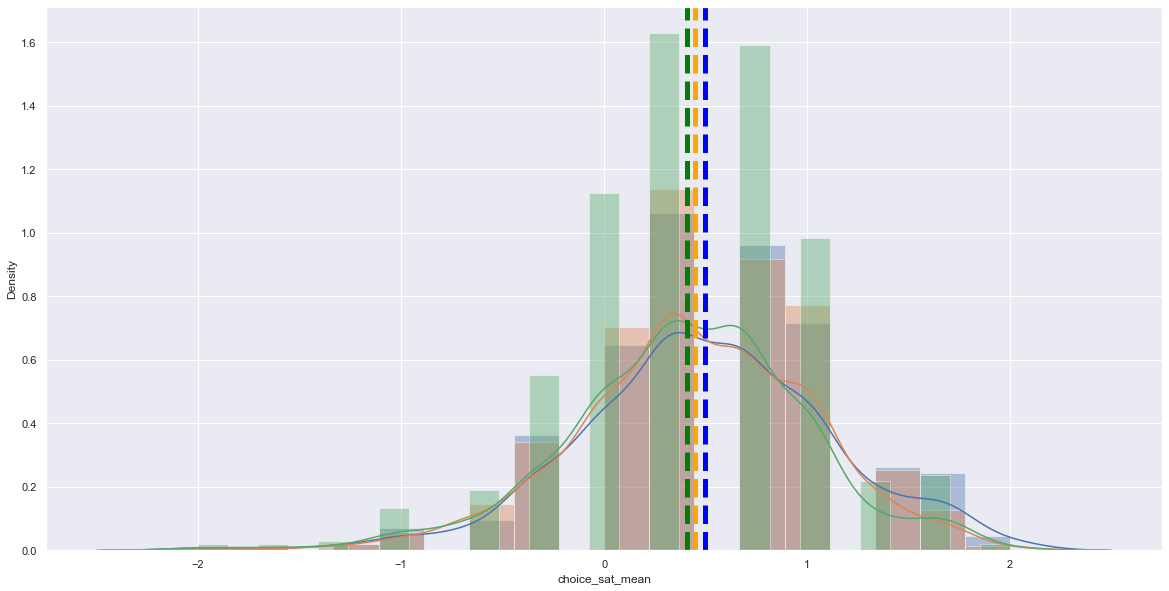

In [11]:
# Compare
plt.figure()
ax1 = sns.distplot(s1['choice_sat_mean'])
ax2 = sns.distplot(s2['choice_sat_mean'])
ax3 = sns.distplot(s3['choice_sat_mean'])
plt.axvline(np.mean(s1['choice_sat_mean']), color='blue', linestyle='dashed', linewidth=5)    # Nutri-score health rank
plt.axvline(np.mean(s2['choice_sat_mean']), color='orange', linestyle='dashed', linewidth=5)  # MTL health rank
plt.axvline(np.mean(s3['choice_sat_mean']), color='green', linestyle='dashed', linewidth=5)   # No-label health rank

# RQ3: To what extent can front-of-pack nutrition labels influence choice satisfaction? 

Summary: 
* Statistically significant difference in choice satisfaction between Nutri-score and No-label

* In the nutriscore condition there is a large difference in choice satisfaction between random ranking and health ranking.
* Why is choice satisfaction highest with random ranking and lowest with health ranking ?
    * Do people choose healthiest recipe despite the fact that they dont really like them? If so, how often is the first 5 recipes choosen in the health ranking condition

* In the MTL condition choice satisfaction is not affected by the ranking of the recipes, and choice satisfaction is stable across the different variants

Ranking: 
* For popular ranking the difference is largest between Nutriscore and no-label.
* For random ranking there is a large difference between Nutriscore and No-label
* For health ranking there is not a significant difference in choice satisfaction between the conditions.

## Compare choice satisfaction between conditions

* h1 = Nutriscore
* h2 = MTL 
* h3 = no label

Strongly disagree = -2
Disagree = -1
Neither disagree/agree = 0
Agree = 1
Strongly agree = 2

In [22]:
f_oneway(s1_sat, s2_sat, s3_sat)

F_onewayResult(statistic=4.033105912010284, pvalue=0.017854508410878697)

In [25]:
# Without vegetarians 
f_oneway(s1_no_veg["choice_sat_mean"], s2_no_veg["choice_sat_mean"], s3_no_veg["choice_sat_mean"])

F_onewayResult(statistic=4.033105912010284, pvalue=0.017854508410878697)

In [26]:
# Without allergies 
f_oneway(s1_no_allerg["choice_sat_mean"], s2_no_allerg["choice_sat_mean"], s3_no_allerg["choice_sat_mean"])

F_onewayResult(statistic=4.033105912010284, pvalue=0.017854508410878697)

In [ ]:
# Compare averages for each condition

In [106]:
s1_sat.mean() # Overall choice satisfaction is highest in the Nutriscore condition

0.48910523875753364

In [107]:
s2_sat.mean()

0.45667125171939477

In [108]:
s3_sat.mean()

0.41104868913857673

### T-test Nutriscore - MTL

In [25]:
stats.ttest_ind(s1_sat, s2_sat)

Ttest_indResult(statistic=1.023201281225648, pvalue=0.30638406825685033)

In [38]:
# Without vegetarians 
stats.ttest_ind(s1_no_veg["fsa_score"], s2_no_veg["fsa_score"])

Ttest_indResult(statistic=1.3047090655284854, pvalue=0.19221952086941382)

In [39]:
# Without allergies 
stats.ttest_ind(s1_no_allerg["fsa_score"], s2_no_allerg["fsa_score"])

Ttest_indResult(statistic=1.3319912649967725, pvalue=0.1830745668157754)

### T-test Nutriscore - No-label

In [28]:
stats.ttest_ind(s1_sat, s3_sat)

Ttest_indResult(statistic=2.424149632162128, pvalue=0.015467684099373514)

In [40]:
# Without vegetarians 
stats.ttest_ind(s1_no_veg["fsa_score"], s3_no_veg["fsa_score"])

Ttest_indResult(statistic=-2.5497390265036204, pvalue=0.010893018418846977)

In [41]:
# Without allergies 
stats.ttest_ind(s1_no_allerg["fsa_score"], s3_no_allerg["fsa_score"])

Ttest_indResult(statistic=-2.6516625752904215, pvalue=0.008098990809798813)

  * **Statistically significant difference in choice satisfaction between Nutri-score and No-label**

### T-test MTL - No-label

In [44]:
stats.ttest_ind(s2_sat, s3_sat)

Ttest_indResult(statistic=1.4908161860108375, pvalue=0.13622922651604646)

In [45]:
# Without vegetarians 
stats.ttest_ind(s2_no_veg["fsa_score"], s3_no_veg["fsa_score"])

Ttest_indResult(statistic=-3.9372440708010745, pvalue=8.66145378054762e-05)

In [46]:
# Without allergies 
stats.ttest_ind(s2_no_allerg["fsa_score"], s3_no_allerg["fsa_score"])

Ttest_indResult(statistic=-4.004024415714614, pvalue=6.547538649877777e-05)

# How is choice satisfaction affected by the ranking in the different conditions? 

## Nutriscore ranking

In [67]:
f_oneway(p1, r1, h1)

F_onewayResult(statistic=2.8807532325155987, pvalue=0.056742906900509864)

In [68]:
# Exclude vegans
f_oneway(s1v1_no_veg["choice_sat_mean"], s1v2_no_veg["choice_sat_mean"], s1v3_no_veg["choice_sat_mean"])

F_onewayResult(statistic=3.1225249617159734, pvalue=0.04471968128686364)

In [69]:
# Exclude vegans
f_oneway(s1v1_no_allerg["choice_sat_mean"], s1v2_no_allerg["choice_sat_mean"], s1v3_no_allerg["choice_sat_mean"])

F_onewayResult(statistic=3.051110421416676, pvalue=0.04792713641423172)

In [80]:
# Popular ranking
print(p1.mean())
print(s1v1_no_veg["choice_sat_mean"].mean())
print(s1v1_no_allerg["choice_sat_mean"].mean())

0.4774011299435028
0.4444444444444443
0.4786324786324785


In [82]:
 # Random ranking
print(r1.mean())
print(s1v2_no_veg["choice_sat_mean"].mean())
print(s1v2_no_allerg["choice_sat_mean"].mean())

0.5634588563458854
0.539906103286385
0.5654008438818567


In [83]:
# Health ranking 
print(h1.mean())
print(s1v3_no_veg["choice_sat_mean"].mean())
print(s1v3_no_allerg["choice_sat_mean"].mean())

0.4275956284153006
0.397553516819572
0.42424242424242437


In [66]:
# Compare random ranking and health ranking in nutriscore condition
stats.ttest_ind(r1, h1)

Ttest_indResult(statistic=2.3032991289909557, pvalue=0.021687703867190516)

* **In the nutriscore condition there is a large difference in choice satisfaction between random ranking and health ranking.**
* **Why is choice satisfaction highest with random ranking and lowest with health ranking ?**
    * Do people choose healthiest recipe despite the fact that they dont really like them? If so, how often is the first 5 recipes choosen in the health ranking condition

## MTL ranking


In [111]:
f_oneway(p2, r2, h2)

F_onewayResult(statistic=0.008584307942902365, pvalue=0.9914525329349658)

In [126]:
# Popular ranking
print("Popular ranking:")
print(p2.mean())
print(s2v1_no_veg["choice_sat_mean"].mean())
print(s2v1_no_allerg["choice_sat_mean"].mean())

# Random ranking
print("Random ranking:")
print(r2.mean())
print(s2v2_no_veg["choice_sat_mean"].mean())
print(s2v2_no_allerg["choice_sat_mean"].mean())

# Health ranking 
print("Health ranking:")
print(h2.mean())
print(s2v3_no_veg["choice_sat_mean"].mean())
print(s2v3_no_allerg["choice_sat_mean"].mean())

Popular ranking:
0.4536652835408022
0.45575221238938035
0.4541666666666665
Random ranking:
0.45592286501377416
0.47514619883040915
0.45643153526970925
Health ranking:
0.4603825136612022
0.4749262536873152
0.4609053497942383


* **In the MTL condition choice satisfaction is not affected by the ranking of the recipes, and choice satisfaction is stable across the different variants**

## Closer look at No-label

In [112]:
f_oneway(p3, r3, h3)

F_onewayResult(statistic=0.3410816786393414, pvalue=0.7111174320545375)

In [75]:
p3.mean() # Popular ranking

0.38537271448663857

In [76]:
r3.mean() # Random ranking

0.4223163841807909

In [77]:
h3.mean() # Health ranking 

0.42538354253835425

In [114]:
# Compare random ranking and health ranking in no label condition
stats.ttest_ind(r3, h3)

Ttest_indResult(statistic=-0.05445025409380078, pvalue=0.956599431573917)

# Choice satisfaction and within-subjects variables 

## Popular ranking 

In [90]:
# P1 = Condition 1 Nutriscore Popularity ranking
# P2 = Condition 2 MTL Popularity ranking
# P3 = Condition 3 No-label Popularity ranking

In [89]:
f_oneway(p1, p2, p3)

F_onewayResult(statistic=1.851517153875477, pvalue=0.15775496745597245)

In [91]:
# Without vegetarians 
f_oneway(s1v1_fsa_no_veg, s2v1_fsa_no_veg, s3v1_fsa_no_veg)

F_onewayResult(statistic=1.012192125590663, pvalue=0.36398658336027057)

In [92]:
# Without allergies 
f_oneway(s1v1_fsa_no_allerg, s2v1_fsa_no_allerg, s3v1_fsa_no_allerg)

F_onewayResult(statistic=1.9765902190566387, pvalue=0.13930675248364346)

In [129]:
# Nutriscore with popular ranking
print("Popular ranking Nutriscore:")
print(p1.mean())
print(s1v1_no_veg["choice_sat_mean"].mean())
print(s1v1_no_allerg["choice_sat_mean"].mean())

# MTL with popular ranking
print("Popular ranking MTL:")
print(p2.mean())
print(s2v1_no_veg["choice_sat_mean"].mean())
print(s2v1_no_allerg["choice_sat_mean"].mean())

# No-label with popular ranking
print("Popular ranking No-label:")
print(p3.mean())
print(s3v1_no_veg["choice_sat_mean"].mean())
print(s3v1_no_allerg["choice_sat_mean"].mean())

Popular ranking Nutriscore:
0.4774011299435028
0.4444444444444443
0.4786324786324785
Popular ranking MTL:
0.4536652835408022
0.45575221238938035
0.4541666666666665
Popular ranking No-label:
0.38537271448663857
0.3881481481481483
0.38297872340425554


In [96]:
stats.ttest_ind(p1, p2)

Ttest_indResult(statistic=0.47524599118187494, pvalue=0.6348301047540295)

In [116]:
stats.ttest_ind(p1, p3)

Ttest_indResult(statistic=1.7898744065175658, pvalue=0.07411636871265238)

In [98]:
stats.ttest_ind(p2, p3)

Ttest_indResult(statistic=1.4466348971949798, pvalue=0.14865737553894853)

* **For popular ranking the difference is largest between Nutriscore and no-label.**

## Random ranking

In [99]:
f_oneway(r1, r2, r3)

F_onewayResult(statistic=3.523730065345153, pvalue=0.030003136329968785)

In [100]:
# Without vegetarians 
f_oneway(s1v2_fsa_no_veg, s2v2_fsa_no_veg, s3v2_fsa_no_veg)

F_onewayResult(statistic=1.5395481125954593, pvalue=0.21524490613511163)

In [101]:
# Without allergies 
f_oneway(s1v2_fsa_no_allerg, s2v2_fsa_no_allerg, s3v2_fsa_no_allerg)

F_onewayResult(statistic=3.7672360613510083, pvalue=0.023579921035301727)

In [130]:
# Nutriscore with Random ranking
print("Random ranking Nutriscore:")
print(r1.mean())
print(s1v2_no_veg["choice_sat_mean"].mean())
print(s1v2_no_allerg["choice_sat_mean"].mean())

# MTL with Random ranking
print("Random ranking MTL:")
print(r2.mean())
print(s2v2_no_veg["choice_sat_mean"].mean())
print(s2v2_no_allerg["choice_sat_mean"].mean())

# No-label with Random ranking
print("Random ranking No-label:")
print(r3.mean())
print(s3v2_no_veg["choice_sat_mean"].mean())
print(s3v2_no_allerg["choice_sat_mean"].mean())

Random ranking Nutriscore:
0.5634588563458854
0.539906103286385
0.5654008438818567
Random ranking MTL:
0.45592286501377416
0.47514619883040915
0.45643153526970925
Random ranking No-label:
0.4223163841807909
0.44345238095238093
0.4173789173789174


In [105]:
stats.ttest_ind(r1, r2)

Ttest_indResult(statistic=1.9494496608578429, pvalue=0.05182494905558879)

In [119]:
stats.ttest_ind(r2, r3)

Ttest_indResult(statistic=0.6129932585583191, pvalue=0.5401735617310095)

In [118]:
stats.ttest_ind(r1, r3)

Ttest_indResult(statistic=2.503071547168604, pvalue=0.012648177302144441)

* **For random ranking there is a large difference between Nutriscore and No-label**

## Health ranking

In [174]:
f_oneway(h1, h2, h3)

F_onewayResult(statistic=0.2277252229214692, pvalue=0.7964000652972383)

In [122]:
# Without vegetarians 
f_oneway(s1v3_fsa_no_veg, s2v3_fsa_no_veg, s3v3_fsa_no_veg)

F_onewayResult(statistic=0.8442691070408364, pvalue=0.43032960080581295)

In [ ]:
# Without allergies 
f_oneway(s1v2_fsa_no_allerg, s2v2_fsa_no_allerg, s3v2_fsa_no_allerg)

In [133]:
# Nutriscore with Health ranking
print("Health ranking Nutriscore:")
print(h1.mean())
print(s1v3_no_veg["choice_sat_mean"].mean())
print(s1v3_no_allerg["choice_sat_mean"].mean())

# MTL with Health ranking
print("Health ranking MTL:")
print(h2.mean())
print(s2v3_no_veg["choice_sat_mean"].mean())
print(s2v3_no_allerg["choice_sat_mean"].mean())

# No-label with Health ranking
print("Health ranking No-label:")
print(h3.mean())
print(s3v3_no_veg["choice_sat_mean"].mean())
print(s3v3_no_allerg["choice_sat_mean"].mean())

Health ranking Nutriscore:
0.4275956284153006
0.397553516819572
0.42424242424242437
Health ranking MTL:
0.4603825136612022
0.4749262536873152
0.4609053497942383
Health ranking No-label:
0.42538354253835425
0.4361233480176217
0.4317862165963436


In [134]:
stats.ttest_ind(h1, h2)

Ttest_indResult(statistic=-0.5566874723500002, pvalue=0.5779972215611981)

In [135]:
stats.ttest_ind(h2, h3)

Ttest_indResult(statistic=0.6181865204051018, pvalue=0.5367449917266105)

In [136]:
stats.ttest_ind(h1, h3)

Ttest_indResult(statistic=0.03753586636642424, pvalue=0.9700733161118344)

* **For health ranking there is not a significant difference in choice satisfaction for the variants between conditions.**

# Personal factors

In [ ]:
## Cooking Experience

In [ ]:
## American vs. Europeans

In [ ]:
## 

# Repeated measure ANOVA
* https://crumplab.github.io/statistics/repeated-measures-anova.html
* https://www.statology.org/repeated-measures-anova-python/

In [19]:
from statsmodels.stats.anova import AnovaRM

#perform the repeated measures ANOVA Nutriscore
print(AnovaRM(data=s1, depvar='choice_sat_mean', subject='user_id', within=['variant'], aggregate_func=np.mean).fit())

                Anova
        F Value Num DF  Den DF  Pr > F
--------------------------------------
variant  4.5166 2.0000 476.0000 0.0114



In [20]:
#perform the repeated measures ANOVA MTL
print(AnovaRM(data=s2, depvar='choice_sat_mean', subject='user_id', within=['variant'], aggregate_func=np.mean).fit())

                Anova
        F Value Num DF  Den DF  Pr > F
--------------------------------------
variant  0.0379 2.0000 469.0000 0.9628



In [24]:
#perform the repeated measures ANOVA No-label
print(AnovaRM(data=s3, depvar='choice_sat_mean', subject='user_id', within=['variant'], aggregate_func=np.mean).fit())

                Anova
        F Value Num DF  Den DF  Pr > F
--------------------------------------
variant  0.3914 2.0000 476.0000 0.6763

